<a href="https://colab.research.google.com/github/syed-muhammad-usman-zafar/PRODIGY_ML_03/blob/main/cats_v_dog_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:09<00:00, 175MB/s]
100% 1.06G/1.06G [00:09<00:00, 120MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [7]:
#generators to divide data in batches
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
# normalize data so pixel value is between 0 and 1
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [9]:
# making CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 75s 104ms/step - loss: 1.5210 - accuracy: 0.5710 - val_loss: 1.0756 - val_accuracy: 0.5546
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5997 - accuracy: 0.6804 - val_loss: 0.8828 - val_accuracy: 0.5502
Epoch 3/10
625/625 [==============================] - 66s 104ms/step - loss: 0.5156 - accuracy: 0.7434 - val_loss: 0.6840 - val_accuracy: 0.5998
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4404 - accuracy: 0.7969 - val_loss: 1.0773 - val_accuracy: 0.5336
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3862 - accuracy: 0.8284 - val_loss: 0.9086 - val_accuracy: 0.6362
Epoch 6/10
625/625 [==============================] - 66s 106ms/step - loss: 0.3159 - accuracy: 0.8614 - val_loss: 0.8128 - val_accuracy: 0.7100
Epoch 7/10
625/625 [==============================] - 66s 106ms/step - loss: 0.2522 - accuracy: 0.8937 - val_loss: 0.6088 - val_ac

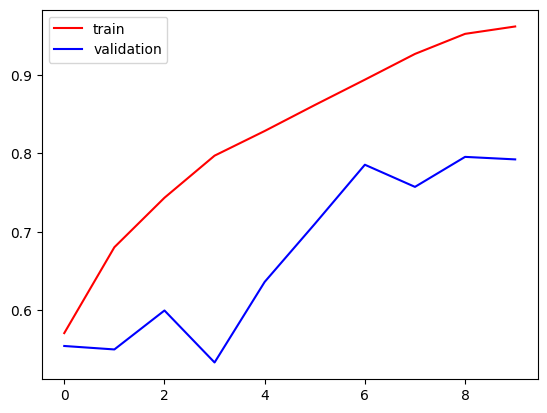

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

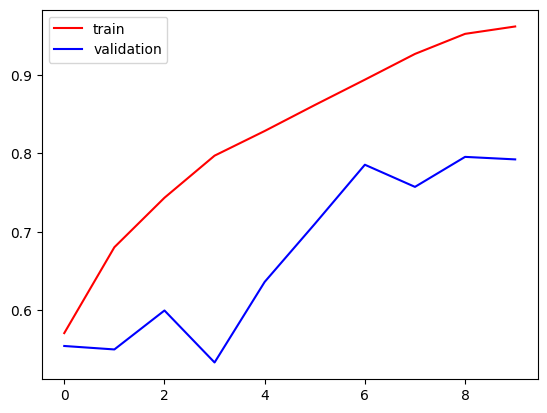

In [17]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

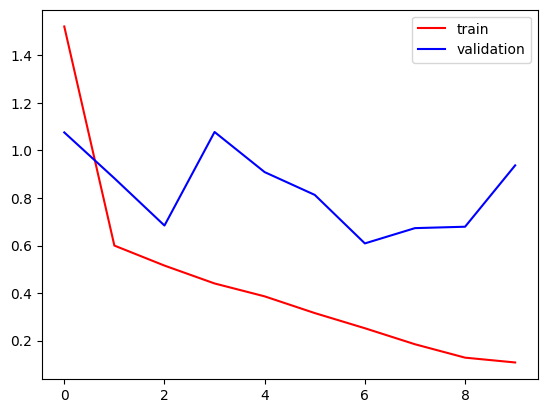

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

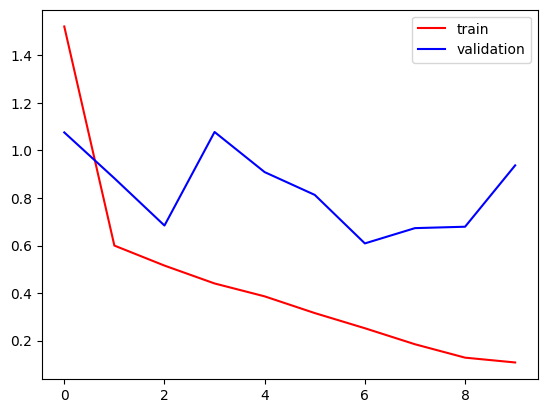

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [103]:
import cv2

In [104]:
test_img = cv2.imread('/content/11270.jpg')

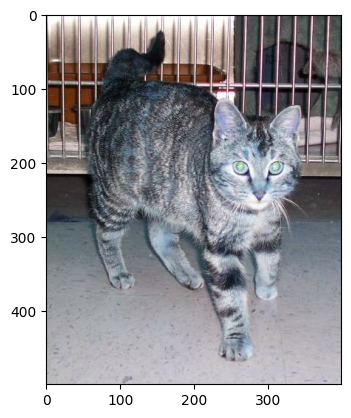

In [105]:
plt.imshow(test_img)

In [106]:
test_img.shape

(500, 399, 3)

In [107]:
test_img=cv2.resize(test_img,(256,256))

In [108]:
test_input = test_img.reshape((1,256,256,3))

In [109]:
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[0.]], dtype=float32)